# Overbooking your hotel

In this exercise, we're going to try and solve an important problem in Economics using Python. 

Imagine this problem:

> You own a hotel, and you know that (on an average night) 8% of your hotel guests who book a room, don't show up. Each room costs 220 USD. If overbooked, we have to place customers at another hotel, which costs us 400 USD.
How many rooms should we overbook in order to maximize expected revenue?

In order to successfully solve this problem, there are a few things we'll need to learn about. First of all, we'll need to understand what it means numerically that "on average, 8% of our hotel guests don't show up". 

It turns out that you can model this with a **binomial distribution**. To understand **the binomial distribution**, an important concept in probability theory which lies at the foundation of data science, you first need to learn a little bit more about the *Bernoulli experiment**.

## The Bernoulli Experiment

A Bernoulli experiment is an experiment for which the probability a certain event occurs is $p$ and
the probability the event does not occur is $(1-p)$; or in other words, the event is has two
possible outcomes: one event occurring with probability $p$ and the other one with probability $(1-p)$.

> **EXAMPLE 1**: A classical example of the Bernoulli experiment is flipping a coin. When flipping a coin, $p$ is equal to 0.5, and the probability of head is 0.5, as well as the probability of tail, which is the other possible event (1-0.5 = 0.5).


> **EXAMPLE 2**: The probability of scoring  a point when being granted a penalty kick in soccer is 0.8. In this case the Bernoulli experiment is whether someone scores or not: $p$ is equal to 0.8, and the probability of not scoring is (1-$p$ = 1-0.8 =0.2).


## Designing a Bernoulli experiment in Python

We can use Python to design a Bernoulli experiment. Let's look at the code we use to generate the Bernoulli experiment that equals tossing a coin:

```python
import numpy as np
print(np.random.binomial(1, 0.5, 1))
```

The first line of code imports the Python `NumPy` library. A library is essentially an open-source reusable chunk of code that you may want to include in your programs / projects. All you need to know is that NumPy is a library widely used in Python, and will help you solve some of the problems you'll see in this course.

The second line of code uses the `random.binomial` function in the NumPy library to run a Bernoulli experiment. The function `random.binomial` takes in three so-called "arguments" here:
  - The first argument represents the number of trials - or how many coin flips we're doing in each experiment
  - The second argument represents $p$ or the probability of "success". 
  - The third argument represents how many experiments you're running (if the difference between argument 1 and 3 is not entirely clear at this time, don't worry - it will become clear later!)
        
Now, run the codeblock below by clicking the right green arrow. You'll see that you either see "1" (= success, say head) as an output, or "0" (no success, say tail). Let's say that we consider head as success, that means running this experiment (or running this code cell) is exactly the same as tossing a coin. Run the code a few times and see how you'll sometimes get a 1 and sometimes a 0!        

In [3]:
import numpy as np

print(np.random.binomial(1, 0.5, 1))

[0]


 The outcome is **random**, but if you run it enough times you'll notice that about half of the times, you'll get 1 about half of the time and 0 about half of the time.

In [4]:
for i in range(10):
    print(np.random.binomial(1, 0.5, 1))

[1]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]


The code above is also known as a "for loop" - this for loop repeats a random experiment (in our case, throwing a dice) 10 times. In other words, you're **running 10 experiments**. Remember that you get a similar type outcome if you change the third argument in the `np.random.binomial()` function to 10, as this is the argument that represents "number of experiments".

In [5]:
print(np.random.binomial(1, 0.5, 10))

[0 0 1 1 0 1 0 0 0 1]


Next, let's look at what happens if we change the first parameter from 1 to 20.

In [6]:
print(np.random.binomial(20, 0.5, 10))

[11 11 10 14 10 11 13 11 11  9]


This output looks like as if we threw 20 coins at a time and counted the number of heads. 
To summarize, each number in the resulting array represents the **total number of “successes”** (say, heads) experienced during 10 experiments of flipping 20 coins (performing 20 trials) per experiment.

## Repeated Bernoulli Experiments

What you've been seeing here is the groundwork of what is called the **binomial distribution**. The binomial distribution is essentially a probability distribution that represents the likelihood of obtaining a predetermined number of successes (say, *r*) in a predetermined number of trials (say, *n*). Like in the Bernoulli experiment, you also need to know ahead of time what the probability of success is (say, $p$).

> *Example*: What is the probability of obtaining "heads" 4 times, when flipping 5 coins? 

In this example, $r=4$, $n=5$ and (because we're talking about a coin flip) $p=0.5$.

The answer to this question (and Binomial distribution as a whole) can be derived mathematically, but in this lesson we'll be **using Python** to get to the answer by repeating the experiment a very high number of times (say, 1000 or even 10000). If it doesn't immediately click, don't worry, you'll see what we mean in a bit!

Let's use `np.random.binomial` and run the experiment "flipping 5 coins" 20 times. 

If you use the function correctly, the output will for each or the 20 experiments simulate how many times "head" was obtained.

In [7]:
np.random.seed(seed=345) # do not change this code, it will ensure a reproducible answer!
print(np.random.binomial(5, 0.5, 20))

[2 3 2 3 2 2 3 2 1 3 3 1 2 4 4 2 2 3 0 3]


Looking at this, you can see that out of the 20 experiments, there were _two_ instances of "obtaining heads 4 times". So looking at this particular example, you can say that you obtained the desired outcome 2 times out of the 20 experiments, so 10% of the times. 

Based on this small set of trials, you could conclude that the probably of obtaining 4 times head is 10%. However, you'll notice that running the experiment 20 times isn't nearly enough to make a conclusive statement on what the actual probability is of getting 4x heads when tossing 5 coins. 

To see this, let's try this again but with another "random seed".
> **about random seeds**: When we use `np.random.binomial`, we're using what's called a "pseudorandom number generator". A pseudorandom number generator will give you different outcomes if you run `np.random.binomial` a second time or a third time, just as if you would roll a dice again, or toss a coin again. To get the exact same outcome, you need to "set a random seed" - so that's exactly what `np.random.seed()` does. Running `np.random.binomial()` right after running `np.random.seed()` will ensure you get the same outcome over and over!


In [8]:
np.random.seed(seed=3456) # do not change this code, it will ensure a reproducible answer!
print(np.random.binomial(5, 0.5, 20))

[3 2 1 4 5 4 1 2 2 2 2 4 2 2 0 3 3 1 4 3]


Out of these 20 experiments, there were _four_ instances of "obtaining head 4 times". So here, you obtained the desired outcome in 4 experiments out of the 20 experiments, so 20% of the times.

Now, to get an accurate approximation of exactly what the probability is of getting 4 times heads, we need to repeat this experiment far more than 20 times. Below, we'll run the experiment 1000 times, 10,000 times, and 100,000 times. We'll store the list of outcomes in `n_1000`, `n_10000` and `n_100000`.

In [9]:
np.random.seed(seed=567) 
n_1000 = np.random.binomial(n=5, p=0.5, size=1000)
n_10000 = np.random.binomial(n=5, p=0.5, size=10000)
n_100000 = np.random.binomial(n=5, p=0.5, size=100000)

Next, to get an understanding of what the proportion of "4"'s is ("how many of my trials resulted in obtaining heads 4 times"), we can use the following code:

In [10]:
print(np.sum(n_1000 == 4) /1000)
print(np.sum(n_10000 == 4) /10000)
print(np.sum(n_100000 == 4) /100000)

0.15625

0.155
0.1536
0.15733


0.15625

When looking at the results, it looks like the probability of getting 4 heads when flipping a coin 5 times is somewhere between $15\%$ and $16\%$. For those of you who like to dive into the mathematics, this probability can actually be calculated mathematically as well! The "binomial probability" can be calculated as follows (don't worry if what follows doesn't immediately click - you'll get really familiar with all this in Flatiron School's Data Science Program):

$P(X=r) = \displaystyle {n\choose r}p^r (1-p)^{n-r}$ 

where

$\displaystyle {n\choose r} = \dfrac{n!}{k!(n-k)!}$


$n!$ is "n factorial". You can calculate $n!$ as $n*(n-1) * (n-2) * 1$. In this case, our $n = 5$ and $5$ factorial is, $5!= 5*4*3*2*1 = 120$. Applying this formula to our problem:


$P(X=4)=\dfrac{5!}{4!(1)!} 0.5^4 (0.5)^{1} =0.15625 $ or $15.625\%$, which is indeed between 15 and 16% as indicated by repeating our experiments thousands of times!


## Visualizing throwing a dice

To get a full picture on how likely it is to throw a heads a certain number of times, you can visualize this in a plot. In the plot below, you can see for each possible outcome (ranging from "throwing heads 0 times" to "throwing heads 5 times" how likely it is: for 4 heads, you see it's about 16% chance. For 3 heads, it's about 31%.

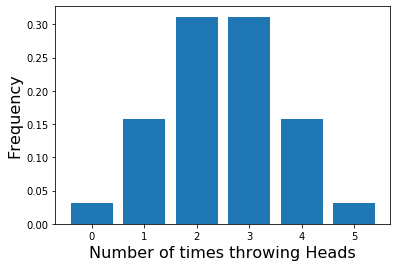

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, patches = ax.hist(n_100000, bins= np.arange(7)-0.5, rwidth=0.8, density = True)
ax.set_xlabel('Number of times throwing Heads', size=16)
ax.set_ylabel('Frequency', size=16)

plt.show()

## Bernoulli experiments to model room bookings

If you have 100 hotel rooms, in an ideal world, you have all of your 100 rooms booked every night.
However, a room booking still holds uncertainty in itself. When someone booked a room at the hotel, the hotel guest showing up is still not $100\%$ certain. In that sense, the "guest showing up" is a probability event at itself, except (hopefully!) with a much higher chance than $50\%$ in the event of a coin toss. in our hotel, on average, 8% of the customers who book a room don't end up staying on a given night.

Let's check in Python what we can expect in terms of room bookings. We'll use NumPy again, and run the "experiment" 10,000 times so we can create a plot like the one before.

In [71]:
np.random.seed(seed=567) 

booking_100000 = np.random.binomial(n=100, p=0.92, size=100000)

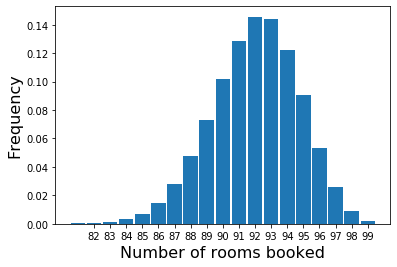

In [72]:
length = len(np.unique(np.array(booking_100000)))
np.unique(np.array(booking_100000))

fig = plt.figure()
ax = fig.add_subplot(111)
# length = len(np.unique(np.array(booking_100000)))
n, bins, patches = ax.hist(booking_100000, bins = np.arange(81,101)-0.5, rwidth=0.9, density = True) #bins = 20
ax.set_xlabel('Number of rooms booked', size=16)
ax.set_ylabel('Frequency', size=16)
ax.set_xticks(range(82,100))
plt.show()

As you can see in this plot, the probability that exactly all guests that booked rooms, is virtually 0.
Out of the 100,000 experiments we ran, only 20 times all 100 rooms are booked (you can't even see that with the naked eye!). This is one night out of every ~14 years! 

## Calculating Profit on any given night

From what you've seen before, it looks like overbooking your hotel seems like a potential solution to use the full capacity of your hotel in an optimal way. But how many rooms should you overbook? The answer depends on the cost structure of overbooking.

For our hotel, we have the following information:

- Our customers pay a price of 220 USD per night for our hotel.
- If on any night we have fewer rooms available than hotel guests, we have to place customers at a competitor hotel, which costs us 400 USD. 


This means that we end up losing 180 USD per room that is overbooked, when more guests show up than number of rooms available.


The total profit on any given night is equal to:

$\text{Profit} = 220 \times \text{(number of booked rooms)} - 400 \times \text{(number of rooms booked - 100 [if more than 100 rooms were booked] )} $


Let's say that in total 104 guests booked a room on a given night, and only 99 show up. Our expected profit that night is then equal to:

$\text{Profit} = 220 \times 104 = 22,880 $ USD

Note how the hotel benefits from overbooking because the customers fully prepay! 


On the other hand, if we overbooked and 104 guests and all of them show up on one given night, the expected is then equal to:


$\text{Profit} = 220 \times 104 - 400 \times 4  = 21,280 $ USD

> NEEDS TO CHANGE: We know, however, that it's hard to predict how many people show up. Now, we can change the work we've been done before and make the plot about profit rather than chance distribution


## Expected Profit when overbooking at 104 rooms

Previously, you saw how overbooking at 104 rooms can give very different profits depending on how many guests actually end up staying in the hotel. Overbooking is a great tool to make more money, but can end up being costly if more hotel guests end up staying than rooms are available.

In this section, we'll look into what our hotel's expected profit is when overbooking 104 rooms.

We can achieve getting the expected profit by taking the following 3 steps:

- Run a Bernoulli experiment like you did before, this time with $n=104$ instead of $n=100$. Let's run the experiment 10,000 times.
- For each of the potential outcomes, we'll calculate the profit.
- Next, we'll calculate the _expected profit_. You'll learn how to do that in a bit!



### 1) The Bernoulli Experiment when booking 104 rooms

In [116]:
np.random.seed(seed=567) 

booking_104= np.random.binomial(n=104, p=0.92, size=10000)

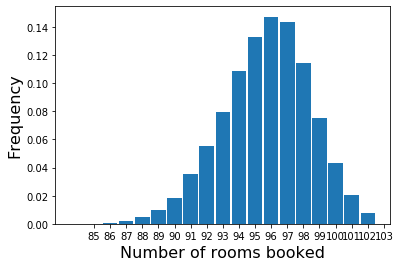

In [121]:
length = len(np.unique(np.array(booking_104)))
np.unique(np.array(booking_104))

fig = plt.figure()
ax = fig.add_subplot(111)
# length = len(np.unique(np.array(booking_100000)))
n, bins, patches = ax.hist(booking_104, bins = np.arange(84,104)-0.5, rwidth=0.9, density = True) #bins = 20
ax.set_xlabel('Number of rooms booked', size=16)
ax.set_ylabel('Frequency', size=16)
ax.set_xticks(range(85,104))
plt.show()

### 2) The Profit Distribution when booking 104 rooms

In [124]:
booking_number = np.array(booking_104)
revenue = 220 * booking_number
cost = (booking_number - 100) * 400
cost_final = np.where(cost<0, 0, cost) 
profit = revenue - cost_final

profit

array([21340, 20020, 19800, ..., 21560, 20680, 21340])

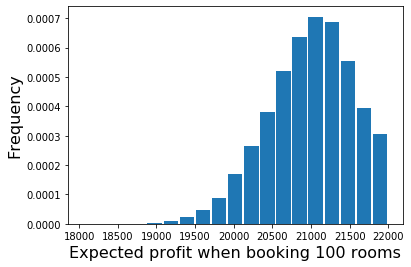

In [129]:
fig = plt.figure()
ax = fig.add_subplot(111)
# length = len(np.unique(np.array(booking_100000)))
n, bins, patches = ax.hist(profit, bins = 19,  rwidth=0.9, density = True) #bins = 20
ax.set_xlabel('Expected profit when booking 100 rooms', size=16)
ax.set_ylabel('Frequency', size=16)
plt.show()

### 3) The Expected Profit

In [108]:
booking_105 = np.random.binomial(n=108, p=0.92, size=100000)


b = np.array(booking_105)
revenue = 220*b
cost = (b-100)*400
cost_pos = np.where(cost<0, 0, cost) 
profit = revenue - cost_pos

profit

array([21460, 21780, 21560, ..., 21820, 21780, 21780])

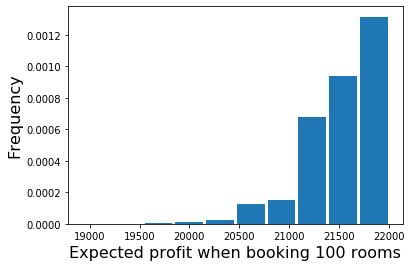

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)
# length = len(np.unique(np.array(booking_100000)))
n, bins, patches = ax.hist(profit,  rwidth=0.9, density = True) #bins = 20
ax.set_xlabel('Expected profit when booking 100 rooms', size=16)
ax.set_ylabel('Frequency', size=16)
plt.show()

## Using Python to define Optimal numbers of rooms booked

In [80]:
if cost>0:
    profit = revenue - cost
else:
    profit = revenue

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

> NEEDS TO CHANGE: We know, however, that it's hard to predict how many people show up. Now, we can change the work we've been done before and make the plot about profit rather than chance distribution

let's say we book at 105


Is overbooking your hotel a wise decision or not?
Hotels often face the problem of customers not showing up. 

To reduce the loss (and optimize the revenue), they often end up overbooking hotel rooms.

Imagine that there are 100 hotel rooms. On average, 8% of customers who book a room don't end up staying at the hotel.

Each room costs 220 USD. If overbooked, we have to place customers at a competitor hotel, which costs us 400 USD. 

How many rooms should we overbook in order to maximize expected revenue?

The solution is in the well-commented code below. 56 is the Optimal number of seats to be booked to maximize the expected profit as shown in the chart below the code snippet.


https://towardsdatascience.com/every-data-scientist-needs-to-read-these-simulation-stories-7be0531e782f

In [94]:
import numpy as np
import matplotlib.pyplot as plt
## code to run simulation for overbooked airlines
## treating numbers of seats being filled out of s seats booked as number of success. Using binomial distribution to 
## quantify the success. defining success as the average 'sucess' when it is observed 10000 times. 
iterations = 1000            # Number of iterations to run simulation 
p = 0.08                        # probability of people not showing up
rooms = np.linspace(start=101, stop=115, num=15)          # 10 different values of extra number of seats to be booked
all_profits = []
for r in rooms:
    successes = np.random.binomial(r, (1-p), iterations)
    success = np.mean(successes)
    revenue = 220*r
    cost =  (success-100)*400
    if cost>0:
        profit = revenue - cost
    else:
        profit = revenue
    all_profits.append(profit)
    
## plotting profits vs seats. Maxima will give the optimum number of seats to be overbooked
# plot(seats, all_profits, xlab = "seats_booked", ylab = "profit_value")

In [95]:
successes = np.random.binomial(101, 0.92, iterations)

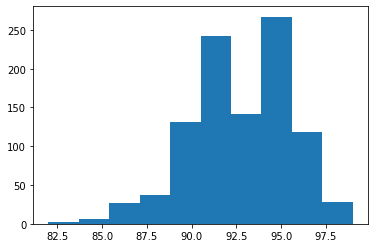

In [96]:
plt.hist(successes);

In [97]:
all_profits

[22220.0,
 22440.0,
 22660.0,
 22880.0,
 23100.0,
 23320.0,
 23540.0,
 23760.0,
 23866.8,
 23664.4,
 23638.4,
 23462.000000000004,
 23236.4,
 23157.999999999996,
 22984.800000000003]

In [98]:
rooms

array([101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115.])

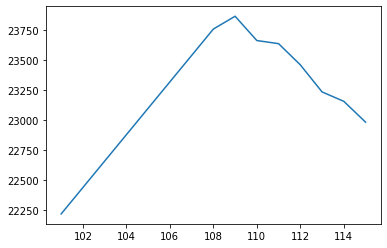

In [99]:
plt.plot(rooms, all_profits);

This all assumes that 